### Exploratory Analysis on Data Subset

**VADER (Valence Aware Dictionary and sEntiment Reasoner) module:**  

Source of reference: [[here]](https://www.kaggle.com/code/niraliivaghani/sentiment-analysis-using-vader)
- It's a rule-based sentiment analyzer that has been trained on social media text, and text from other domains
- Advantage: can assess the sentiment of any given text without the need for previous training unlike ML models
- Output: A dictionary of 4 keys negative, neutral, positive, and compound
- Compound: Sum of the valence score of each word in the lexicon. Determines the degree of the sentiment rather than the actual value as opposed to the previous ones. Its value is between -1 and +1. Using the compound score can be enough to determine the underlying sentiment of a text, because for:    
    1. `Positive sentiment, compound >= +0.5`
    2. `Negative sentiment, compound <= -0.5`
    3. `Neutral sentiment, compound between -0.5 and +0.5`

In [5]:
# read the csv file containing amazon reviews data
import pandas as pd
df = pd.read_csv("C:/Users/yippe/OneDrive/Documents/Data/Amazon_Reviews/batch_reviews.csv")

In [6]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,42521656.0,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5.0,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31
1,US,12049833.0,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5.0,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31
2,US,107642.0,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5.0,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31
3,US,6042304.0,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5.0,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31
4,US,18123821.0,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5.0,0.0,0.0,N,Y,Five Stars,good,2015-08-31


In [7]:
# import necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download("vader_lexicon")

In [8]:
sentiment = SentimentIntensityAnalyzer()

# create columns for positive, negative, neutral, and compound
df["Positive"] = [sentiment.polarity_scores(i)["pos"] for i in df["review_body"]]
df["Negative"] = [sentiment.polarity_scores(i)["neg"] for i in df["review_body"]]
df["Neutral"] = [sentiment.polarity_scores(i)["neu"] for i in df["review_body"]]
df['Compound'] = [sentiment.polarity_scores(i)["compound"] for i in df["review_body"]]

In [9]:
# Check dataframe
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Positive,Negative,Neutral,Compound
0,US,42521656.0,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5.0,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31,0.119,0.049,0.832,0.8096
1,US,12049833.0,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5.0,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31,0.305,0.000,0.695,0.6915
2,US,107642.0,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5.0,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31,0.462,0.000,0.538,0.8286
3,US,6042304.0,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5.0,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31,0.429,0.000,0.571,0.8500
4,US,18123821.0,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5.0,0.0,0.0,N,Y,Five Stars,good,2015-08-31,1.000,0.000,0.000,0.4404


In [10]:
# identify sentiment based on compound value
score = df["Compound"].values
sentiment = []

for i in score:
    if i >= 0.05:
        # label positive
        sentiment.append('Positive')
    elif i <= -0.05:
        # label negative
        sentiment.append('Negative')
    else:
        # label neutral
        sentiment.append('Neutral')

df["Sentiment"] = sentiment
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Positive,Negative,Neutral,Compound,Sentiment
0,US,42521656.0,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5.0,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31,0.119,0.049,0.832,0.8096,Positive
1,US,12049833.0,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5.0,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31,0.305,0.000,0.695,0.6915,Positive
2,US,107642.0,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5.0,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31,0.462,0.000,0.538,0.8286,Positive
3,US,6042304.0,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5.0,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31,0.429,0.000,0.571,0.8500,Positive
4,US,18123821.0,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5.0,0.0,0.0,N,Y,Five Stars,good,2015-08-31,1.000,0.000,0.000,0.4404,Positive


In [11]:
# remove unnecessary columns
df.drop(df[['Positive', 'Negative', 'Neutral']], axis = 1, inplace = True)

# check dataframe
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Compound,Sentiment
0,US,42521656.0,R26MV8D0KG6QI6,B000SAQCWC,159713740,"The Cravings Place Chocolate Chunk Cookie Mix,...",Grocery,5.0,0.0,0.0,N,Y,Using these for years - love them.,"As a family allergic to wheat, dairy, eggs, nu...",2015-08-31,0.8096,Positive
1,US,12049833.0,R1OF8GP57AQ1A0,B00509LVIQ,138680402,"Mauna Loa Macadamias, 11 Ounce Packages",Grocery,5.0,0.0,0.0,N,Y,Wonderful,"My favorite nut. Creamy, crunchy, salty, and ...",2015-08-31,0.6915,Positive
2,US,107642.0,R3VDC1QB6MC4ZZ,B00KHXESLC,252021703,Organic Matcha Green Tea Powder - 100% Pure Ma...,Grocery,5.0,0.0,0.0,N,N,Five Stars,This green tea tastes so good! My girlfriend l...,2015-08-31,0.8286,Positive
3,US,6042304.0,R12FA3DCF8F9ER,B000F8JIIC,752728342,15oz Raspberry Lyons Designer Dessert Syrup Sauce,Grocery,5.0,0.0,0.0,N,Y,Five Stars,I love Melissa's brand but this is a great sec...,2015-08-31,0.8500,Positive
4,US,18123821.0,RTWHVNV6X4CNJ,B004ZWR9RQ,552138758,"Stride Spark Kinetic Fruit Sugar Free Gum, 14-...",Grocery,5.0,0.0,0.0,N,Y,Five Stars,good,2015-08-31,0.4404,Positive


In [12]:
# check the sentiment counts
df['Sentiment'].value_counts()

Positive    70897
Negative     8075
Neutral      8023
Name: Sentiment, dtype: int64

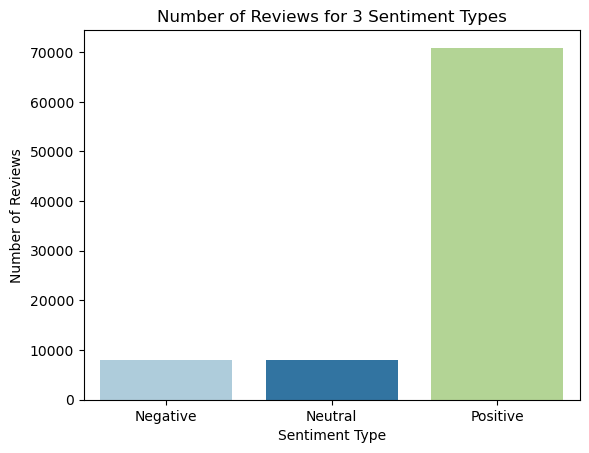

In [14]:
# Plot the bar chart for positive, negative, neutral reviews
# create bar chart
import matplotlib.pyplot as plt
%matplotlib inline

bar = df[['Sentiment']].groupby('Sentiment')['Sentiment'].count().rename_axis('Sentiment').reset_index(name='Frequency')

# creating the bar plot
import seaborn as sns
sns.barplot(x = 'Sentiment',
            y = 'Frequency',
            data = bar, 
            palette = 'Paired')

plt.xlabel("Sentiment Type")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews for 3 Sentiment Types")
plt.show()

**Finding 1:** There are significantly more positive reviews than negative and neutral combined which is substantially a good thing. 

**Top 10 Products with Highest Number of Reviews**

In [15]:
# Checking the 10 products with highest number of reviews
high_number_reviews = df.groupby('product_title')['product_title'].count().sort_values(ascending = False).rename_axis('product_title').reset_index(name='Frequency').head(10)

# print the data
high_number_reviews

,product_title,Frequency
0,San Francisco Bay One Cup,513
1,Viva Naturals Organic Extra Virgin Coconut Oil...,419
2,"V8 V-Fusion +Energy Drinks, 8 Fl Oz",238
3,Amazing Grass Green Superfood,179
4,Matcha Green Tea Powder,173
5,"Jif Chocolate Nut Butter Almond Granola Bars, ...",170
6,Sherpa Pink Himalayan Salt,147
7,Healthworks Cacao Powder Parent,141
8,BeanBoozled Spinner Jelly Bean Gift Box - 3.5 oz,139
9,Green Mountain Coffee Dark Magic Keurig Single...,133


In [16]:
# check the list of names to refine long titles to shorter ones
list(high_number_reviews['product_title'])

['San Francisco Bay One Cup',
 'Viva Naturals Organic Extra Virgin Coconut Oil, 16 Ounce',
 'V8 V-Fusion +Energy Drinks, 8 Fl Oz',
 'Amazing Grass Green Superfood',
 'Matcha Green Tea Powder',
 'Jif Chocolate Nut Butter Almond Granola Bars, 5 Count Pack',
 'Sherpa Pink Himalayan Salt',
 'Healthworks Cacao Powder Parent',
 'BeanBoozled Spinner Jelly Bean Gift Box - 3.5 oz',
 'Green Mountain Coffee Dark Magic Keurig Single-Serve K-Cup Pods, Dark Roast Coffee, 24 Count']

C:\Users\yippe\AppData\Local\Temp\ipykernel_3676\1254561017.py:17: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey',
C:\Users\yippe\AppData\Local\Temp\ipykernel_3676\1254561017.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_axis)


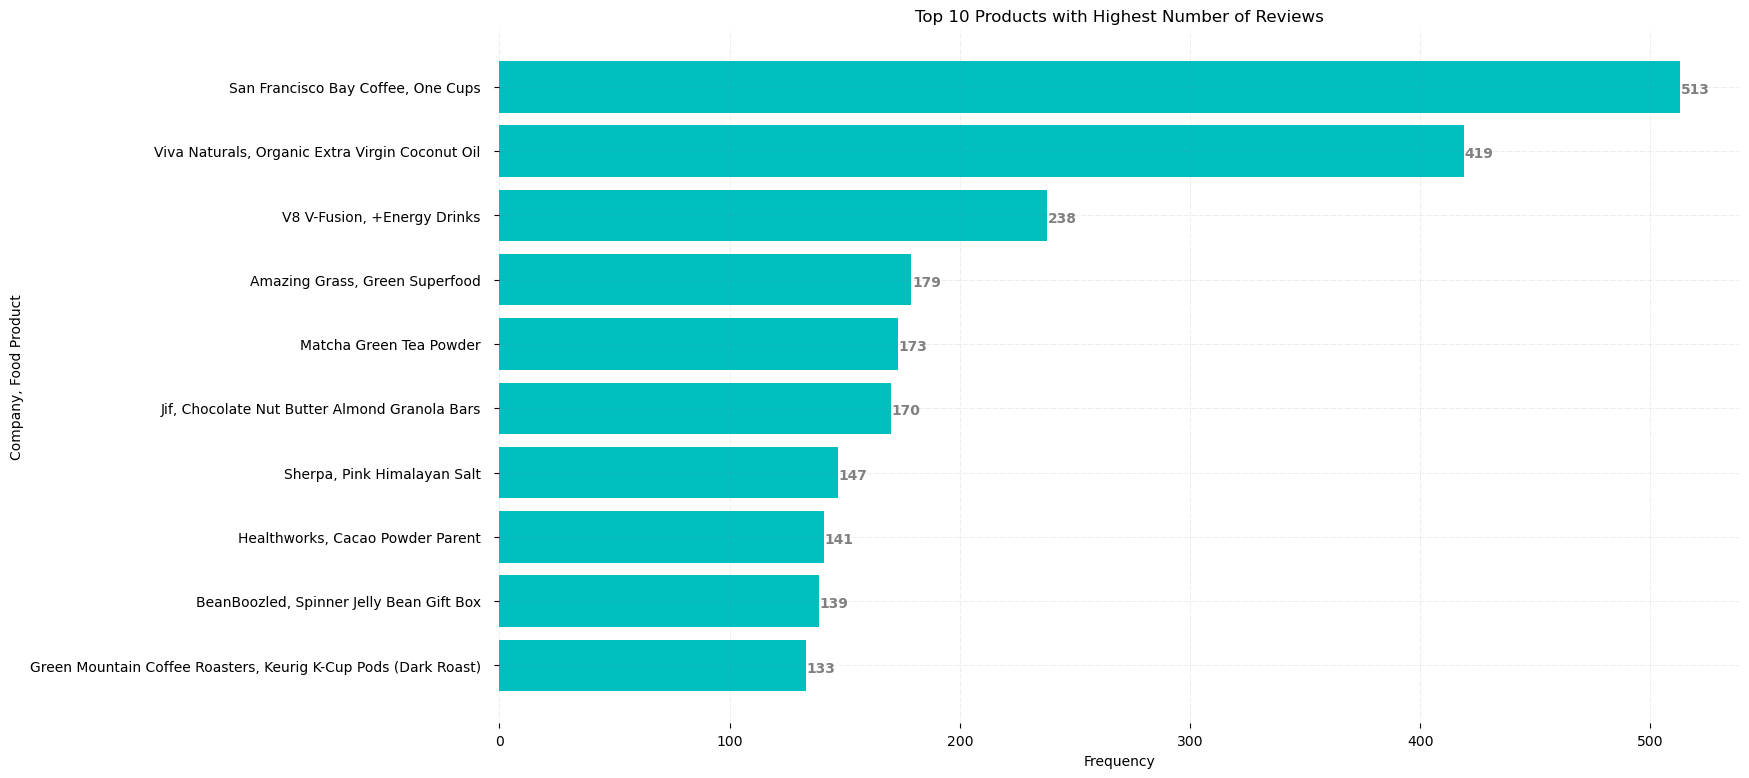

In [17]:
#----------------- Plot the graph ----------------------
fig, ax = plt.subplots(figsize = (16, 9))
ax.barh(high_number_reviews['product_title'], high_number_reviews['Frequency'], color = 'c')
ax.set_ylabel('Company, Food Product')
ax.set_xlabel('Frequency')
ax.set_title('Top 10 Products with Highest Number of Reviews')

# remove axes splines (square border)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)

# show top values
ax.invert_yaxis()

# Refine y axis labels
y_axis = ['San Francisco Bay Coffee, One Cups',
          'Viva Naturals, Organic Extra Virgin Coconut Oil',
          'V8 V-Fusion, +Energy Drinks',
          'Amazing Grass, Green Superfood',
          'Matcha Green Tea Powder',
          'Jif, Chocolate Nut Butter Almond Granola Bars',
          'Sherpa, Pink Himalayan Salt',
          'Healthworks, Cacao Powder Parent',
          'BeanBoozled, Spinner Jelly Bean Gift Box',
          'Green Mountain Coffee Roasters, Keurig K-Cup Pods (Dark Roast)']
ax.set_yticklabels(y_axis)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

# Show Plot
plt.show()

**Top 20 products with Lowest Number of Reviews**

In [18]:
# Checking the 20 products with lowest number of reviews
low_number_reviews = df.groupby('product_title')['product_title'].count().sort_values(ascending = False).rename_axis('product_title').reset_index(name='Frequency').tail(20)

# print the data
low_number_reviews

,product_title,Frequency
36685,"Honest Tea Certified Organic, Fair Trade Certi...",1
36686,Honest Organic Just Black Iced Tea - 44 K Cup ...,1
36687,Honest Organic Just Black Iced Tea - 22 K Cup ...,1
36688,Honest Kids Organic Variety Juice Drink Variet...,1
36689,"Honest Just Unsweetened Green Tea, 16 Ounce --...",1
36690,Honees Milk and Honey candy (24 count),1
36691,"Homestate Farms Maltex Hot Wheat Cereal, 20 Ou...",1
36692,HomeBrewStuff Fuggle Hops - 2 oz Pellets,1
36693,Homestat Farm Organic Quick Steel Cut Oats & C...,1
36694,Homemade Oatmeal Raisin Cookies - 1 Dozen,1


**Finding 2:**
Products that seem to recieve the most reviews are mostly well-known brands for healthy and organic superfoods, coffee pods, and matcha tea. On the other hand, products that recieve the least reviews are often homemade goods.

**Distribution of positive, neutral, and negative reviews for top 10 most reviewed products**

In [48]:
# count number of sentiments for top 10 products

ls = ['Amazing Grass','BeanBoozled','Green Mountain','Healthworks','Jif','Matcha','SF Bay Coffee','Sherpa','V8 V-Fusion','Viva Naturals']

# list of the feature names
lis = list(high_number_reviews['product_title'])

# extract data that contains names found in lis
dis = df[df['product_title'].isin(lis)]
dis = dis.groupby(['product_title','Sentiment'])['Sentiment'].count().reset_index(name='Frequency')
dis = dis.pivot_table(index = 'product_title', columns = 'Sentiment')

# drop the multi-index level
dis.columns = dis.columns.droplevel()

# drop the columns.names 'Sentiment'
dis.columns.name = None

# reset the index to flatten the columns
ax = pd.DataFrame(dis.to_records())
ax 

,product_title,Negative,Neutral,Positive
0,Amazing Grass Green Superfood,18.0,8.0,153.0
1,BeanBoozled Spinner Jelly Bean Gift Box - 3.5 oz,19.0,5.0,115.0
2,Green Mountain Coffee Dark Magic Keurig Single...,6.0,11.0,116.0
3,Healthworks Cacao Powder Parent,5.0,16.0,120.0
4,"Jif Chocolate Nut Butter Almond Granola Bars, ...",1.0,NaN,169.0
5,Matcha Green Tea Powder,2.0,7.0,164.0
6,San Francisco Bay One Cup,38.0,21.0,454.0
7,Sherpa Pink Himalayan Salt,4.0,15.0,128.0
8,"V8 V-Fusion +Energy Drinks, 8 Fl Oz",5.0,1.0,232.0
9,Viva Naturals Organic Extra Virgin Coconut Oil...,21.0,24.0,374.0


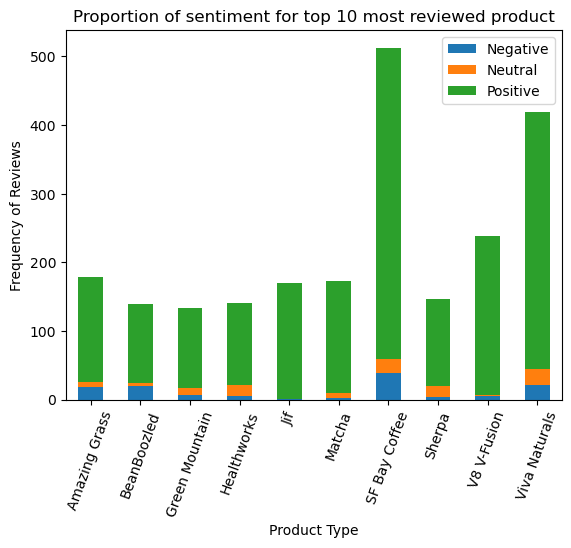

In [59]:
# plot stacked 
ax.plot(x = 'product_title', kind = 'bar', stacked = True, rot = 90, 
        title = 'Proportion of sentiment for top 10 most reviewed product')

tickvalues = range(0,len(ax['product_title'])) 

plt.xticks(ticks = tickvalues, labels = ls, rotation = 70) 

plt.xlabel('Product Type')
plt.ylabel('Frequency of Reviews')
plt.show()

**Finding 3:** When looking at the proportion of sentiment reviews for each product, we can see that products like Jif and V8 V-fusion have the highest ratio of positive to neutral/negative reviews. Ratio of the sentiment reviews differ for each product with some having more negative reviews than others. Regardless, large majority of the reviews for all products are mostly positive.

In [61]:
# create a csv for subsequent analysis
# df.to_csv(r'C:/Users/yippe/OneDrive/Documents/Data/Amazon_Reviews/batch_reviews_eda_sentiment_2.csv', index = False, header = True)